In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:xlabel='Outcome', ylabel='count'>

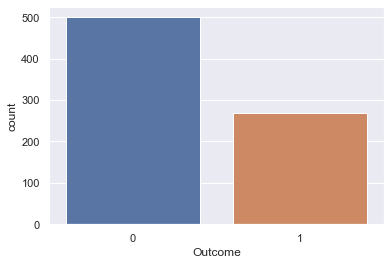

In [7]:
sns.countplot(df['Outcome'],label="Count")

In [8]:
n1 = len(df)
n2 = len(df.loc[df['Outcome'] == 1])
n3 = len(df.loc[df['Outcome'] == 0])
print("True cases:  {0} ({1:2.2f}%)".format(n2, ((1.00 * n2)/(1.0 * n1)) * 100))
print("False cases: {0} ({1:2.2f}%)".format(n3, (( 1.0 * n3)/(1.0 * n1)) * 100))

True cases:  268 (34.90%)
False cases: 500 (65.10%)


In [9]:
# Count of NaN
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

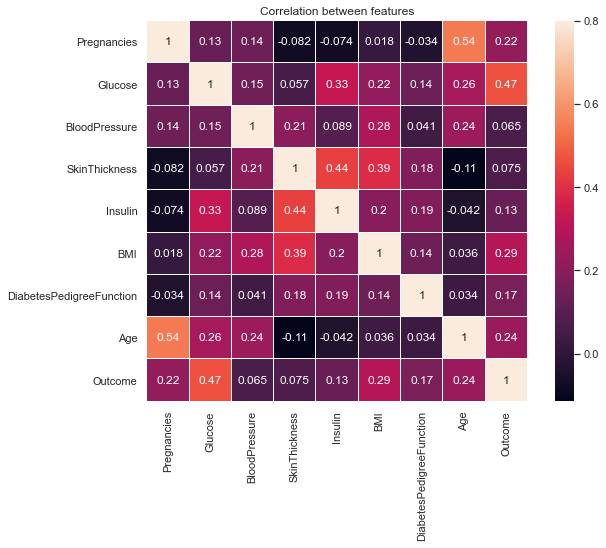

In [10]:
# Heatmap to check for correlation
corr=df.corr()

sns.set(font_scale=1.00)
plt.figure(figsize=(10, 7))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)
plt.title('Correlation between features');

In [11]:
# Replacing zero values with NaN
df2=df
df2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [12]:
#Count of NaN
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# Replacing NaN with mean values
df2["BloodPressure"].fillna(df2["BloodPressure"].mean(), inplace = True)
df2["BMI"].fillna(df2["BMI"].mean(), inplace = True)
df2["Glucose"].fillna(df2["Glucose"].mean(), inplace = True)
df2["Insulin"].fillna(df2["Insulin"].mean(), inplace = True)
df2["SkinThickness"].fillna(df2["SkinThickness"].mean(), inplace = True)


In [14]:
# Statistical summary
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# Random forest Algorithm
rf = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

# Support Vector Classifier Algorithm
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

#Logistic Regression Algorithm
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

# Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train, y_train)

#Gradient Bossting Classifier Algorithm
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Decision tree Algorithm
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtree.fit(X_train, y_train)

#K nearest neighbors Algorithm
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=24)

In [17]:
# Predictions on test data
y_pred_rf = rf.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Accuracy calculations
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


In [18]:
# Comparing Accuracy on test set
print("Random Forest: " + str(accuracy_rf * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Logistic Regression: " + str(accuracy_lr * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Gradient Boosting Classifier: " + str(accuracy_gb * 100))
print("Decision tree: " + str(accuracy_dtree * 100))
print("K Nearest Neighbors: " + str(accuracy_knn * 100))

Random Forest: 76.5625
Support Vector Classifier: 78.125
Logistic Regression: 78.125
Naive Bayes: 77.08333333333334
Gradient Boosting Classifier: 78.64583333333334
Decision tree: 78.125
K Nearest Neighbors: 77.08333333333334


Accuracy: 78.64583333333334


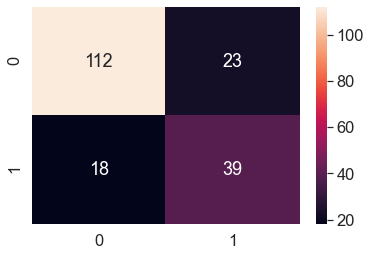

In [19]:
#Gradient Boosting Classifier Algorithm
#Accuracy
print("Accuracy: " + str(accuracy_score(y_test, y_pred_gb) * 100))
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred_gb, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

[0.05692496 0.37615067 0.04208426 0.02859175 0.0625682  0.18978805
 0.10722991 0.1366622 ]


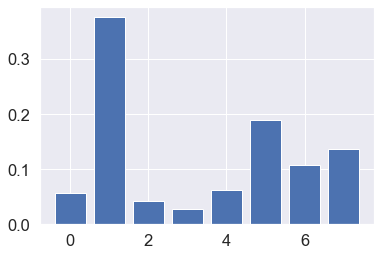

In [20]:
# feature importance
print(gb.feature_importances_)
# plot
plt.bar(range(len(gb.feature_importances_)), gb.feature_importances_)
plt.show()

In [21]:
df2.drop(['BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction'], 1, inplace=True)

In [22]:
df2.head(5)

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6,148.0,155.548223,33.6,50,1
1,1,85.0,155.548223,26.6,31,0
2,8,183.0,155.548223,23.3,32,1
3,1,89.0,94.000000,28.1,21,0
4,0,137.0,168.000000,43.1,33,1


In [23]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Gradient Bossting Classifier Algorithm
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier: " + str(accuracy_gb * 100))

Gradient Boosting Classifier: 78.64583333333334
